In [1]:
pip install nbconvert PyPDF2

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Excercises

We've covered quite a bit, but now its time to build up your intuition and play around some more with what we've worked on.

Emphasis on the word play, as it's very important to try a few things out, run the code and see what happens.

1. Create your own regression dataset(or make the one we created in 'create data to view and fit' bigger) and fit a model to it.
2. Try building a neural network with 4 dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers perform?)
* Increasing the number of units in each layer
* Lookup the documentation of `Adam` and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Bostom pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow `tf.keras.datasets` and model it.

### Create dataset

I'm thinking of creating data thats a little more complex than `x = y+10`. I'm going to see if I can apply a sine wave on the data of y.

In [279]:
# Make X dataset with 500 results
X = np.arange(-500, 1500)
X

array([-500, -499, -498, ..., 1497, 1498, 1499])

In [280]:
# Make y dataset
y = (np.sin(X)*35) + (X/35) # a more complex y dataset, using sin on X multiplied by 35, along with increasing y by X/35
y

array([  2.0862989 , -31.44197953, -49.17059838, ...,  77.75450315,
        60.78562572,  27.28084695])

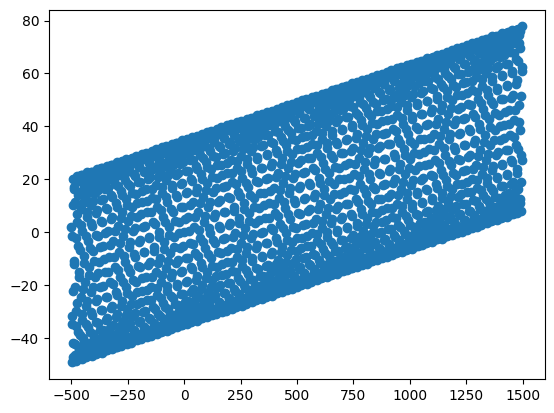

In [281]:
# let's visualize the data we're working with
plt.scatter(X,y);

In [285]:
# separate the data into training and test datasets
X_train = X[:1800] # total 2,000 data points, splitting 90/10 with train and test as this may be pretty complex for the model
y_train = y[:1800]

X_test = X[1800:]
y_test = y[1800:]

len(X_train), len(X_test)

(1800, 200)

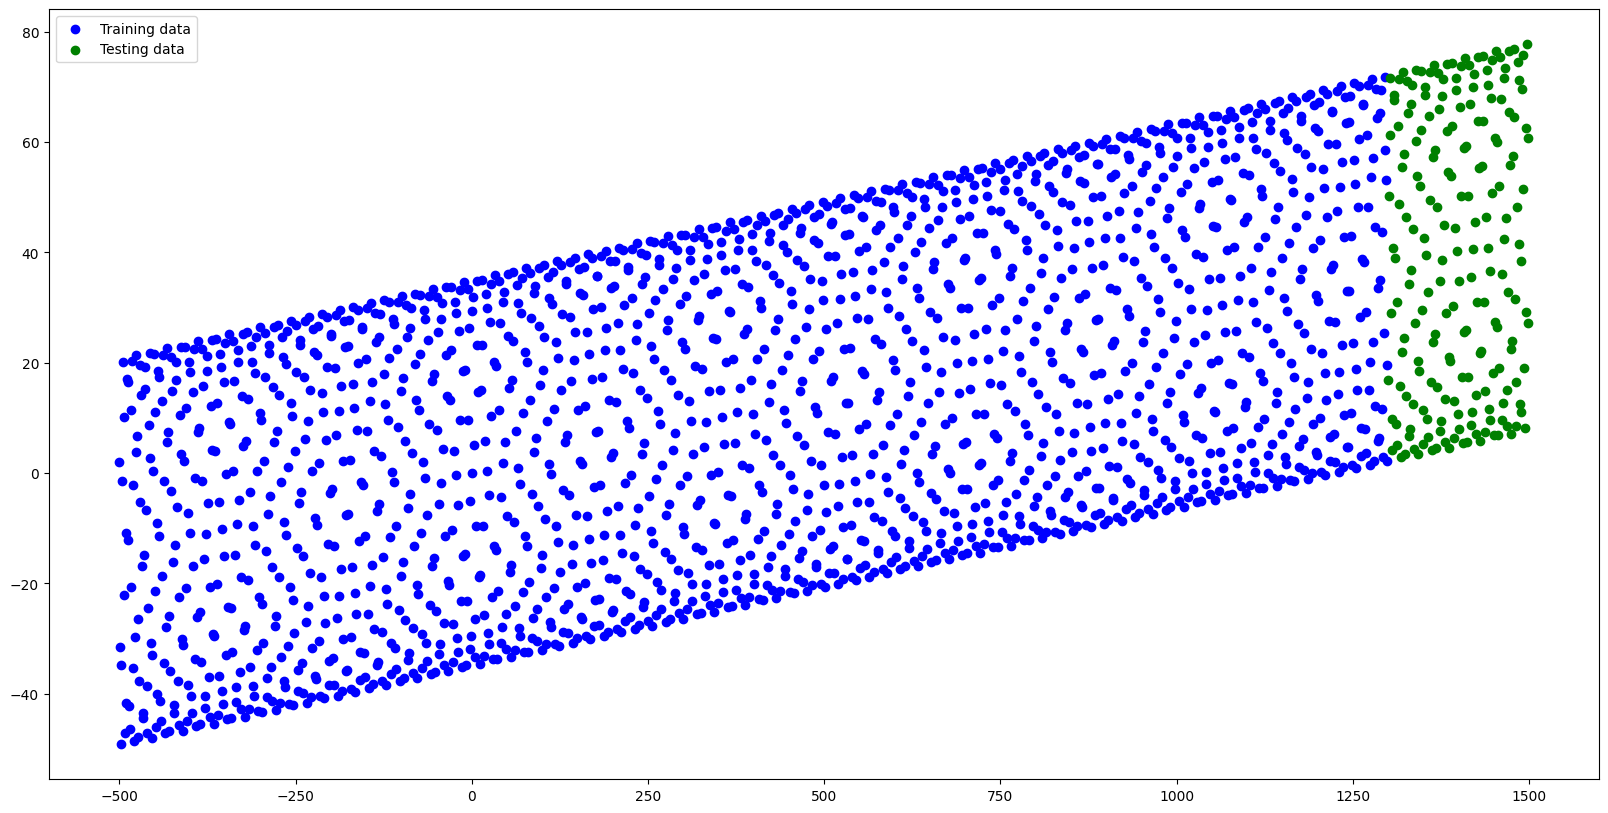

In [286]:
# visualize the separate data of training and test in a graph
plt.figure(figsize=(20,10))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Now we've got our 2,000 datapoints, and have set up training and test datasets, we'll get to creating our ML model with 4 Dense layers.

In [292]:
# Set seet
tf.random.set_seed(35)

# create model, with 4 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan        
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan
Epoch 14/100
57/57 ━━━━━━━

Hmmmm strange that its only returning nan value, despite executing properly. Let's see if it could be because of the layers in our model causing the issue.

In [299]:
# Set seet
tf.random.set_seed(35)

# create model, with 4 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1346.3323 - mae: 1346.3323
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1436.5577 - mae: 1436.5577
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1470.9430 - mae: 1470.9430
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1470.5237 - mae: 1470.5237
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1471.6185 - mae: 1471.6185
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1469.8169 - mae: 1469.8169
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1471.5468 - mae: 1471.5468
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1469.7452 - mae: 1469.7452
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1471.4750 - mae: 1471.4750
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1469.6735 - mae: 1469.6735
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1471.4442 - mae: 1471.4442
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Hmmm strange, `Epoch 1` had the best results, and only got progressively worse around `Epoch 5`, then continues to flatline at that poor loss/mae performance.

Let's see the results of model1

In [306]:
model1 = model

y_preds1 = model1.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [307]:
y_preds1

array([[5871.217 ],
       [5875.733 ],
       [5880.249 ],
       [5884.7646],
       [5889.281 ],
       [5893.7964],
       [5898.3125],
       [5902.8286],
       [5907.344 ],
       [5911.8604],
       [5916.3765],
       [5920.892 ],
       [5925.408 ],
       [5929.924 ],
       [5934.44  ],
       [5938.956 ],
       [5943.4717],
       [5947.988 ],
       [5952.504 ],
       [5957.0195],
       [5961.5356],
       [5966.0513],
       [5970.5674],
       [5975.0835],
       [5979.599 ],
       [5984.115 ],
       [5988.6313],
       [5993.147 ],
       [5997.663 ],
       [6002.179 ],
       [6006.695 ],
       [6011.211 ],
       [6015.7266],
       [6020.2427],
       [6024.759 ],
       [6029.2744],
       [6033.7905],
       [6038.3066],
       [6042.8223],
       [6047.3384],
       [6051.854 ],
       [6056.37  ],
       [6060.886 ],
       [6065.402 ],
       [6069.918 ],
       [6074.434 ],
       [6078.9497],
       [6083.466 ],
       [6087.9814],
       [6092.4976],


We'll establish a function to plot our training, test, and prediction data

In [308]:
def plot_prediction(X_train, y_train, X_test, y_test, y_preds):
    """
    Plotting our training, test and prediction data
    """
    plt.figure(figsize=(10,15))
    plt.scatter(X_train, y_train, c='b', label='Training data')
    plt.scatter(X_test, y_test, c='g', label='Testing data')
    plt.scatter(X_test, y_preds, c='r', label='Predictions')
    plt.legend();

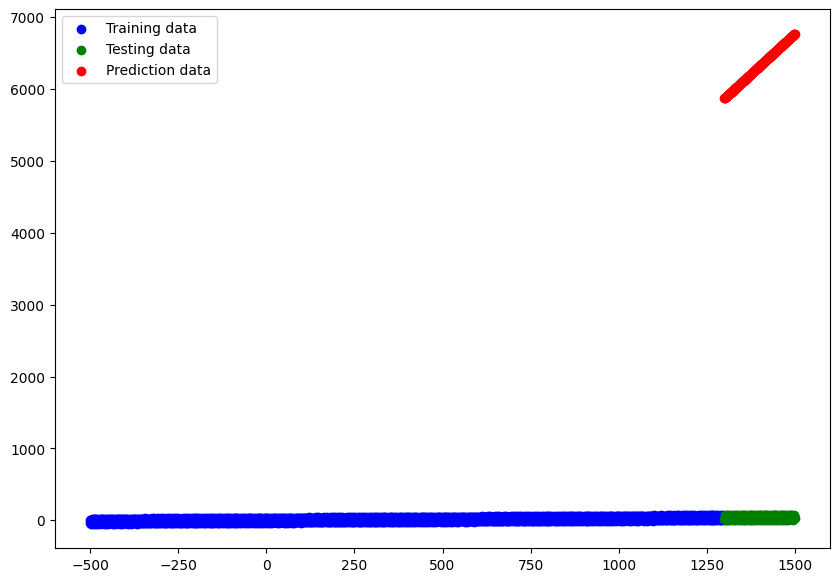

In [309]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds1)

Hmmm it seems to be very inaccurate. Sure it did predict that as `X` increases, then y should increase as well. But it's taken that factor out of proportion, and estimated y values over 6000! Let's see what we can do to our model to further improve accuracy.

### Normalization
We'll try normalize our values to between 0 and 1, as this is a common way to preprocess our data, and is easier for the machine learning model to digest the training data. We'll use `MinMaxScaler`.

In [314]:
# normalize our data with MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) # state that our min max results are between 0 and 1, effectively normalizing it
y_scaled = scaler.fit_transform(tf.expand_dims(y, axis=-1)) # fit our scaler function onto y, and expand y from 1D to 2D array to not cause error
y_scaled

array([[0.40383578],
       [0.1396778 ],
       [0.        ],
       ...,
       [1.        ],
       [0.86630795],
       [0.60233511]])

In [315]:
y_scaled_train = y_scaled[:1800] # new scaled train dataset
y_scaled_test = y_scaled[1800:] # new scaled test dataset

let's copy and paste down the visualized data graph and see if its sucessfully normalized

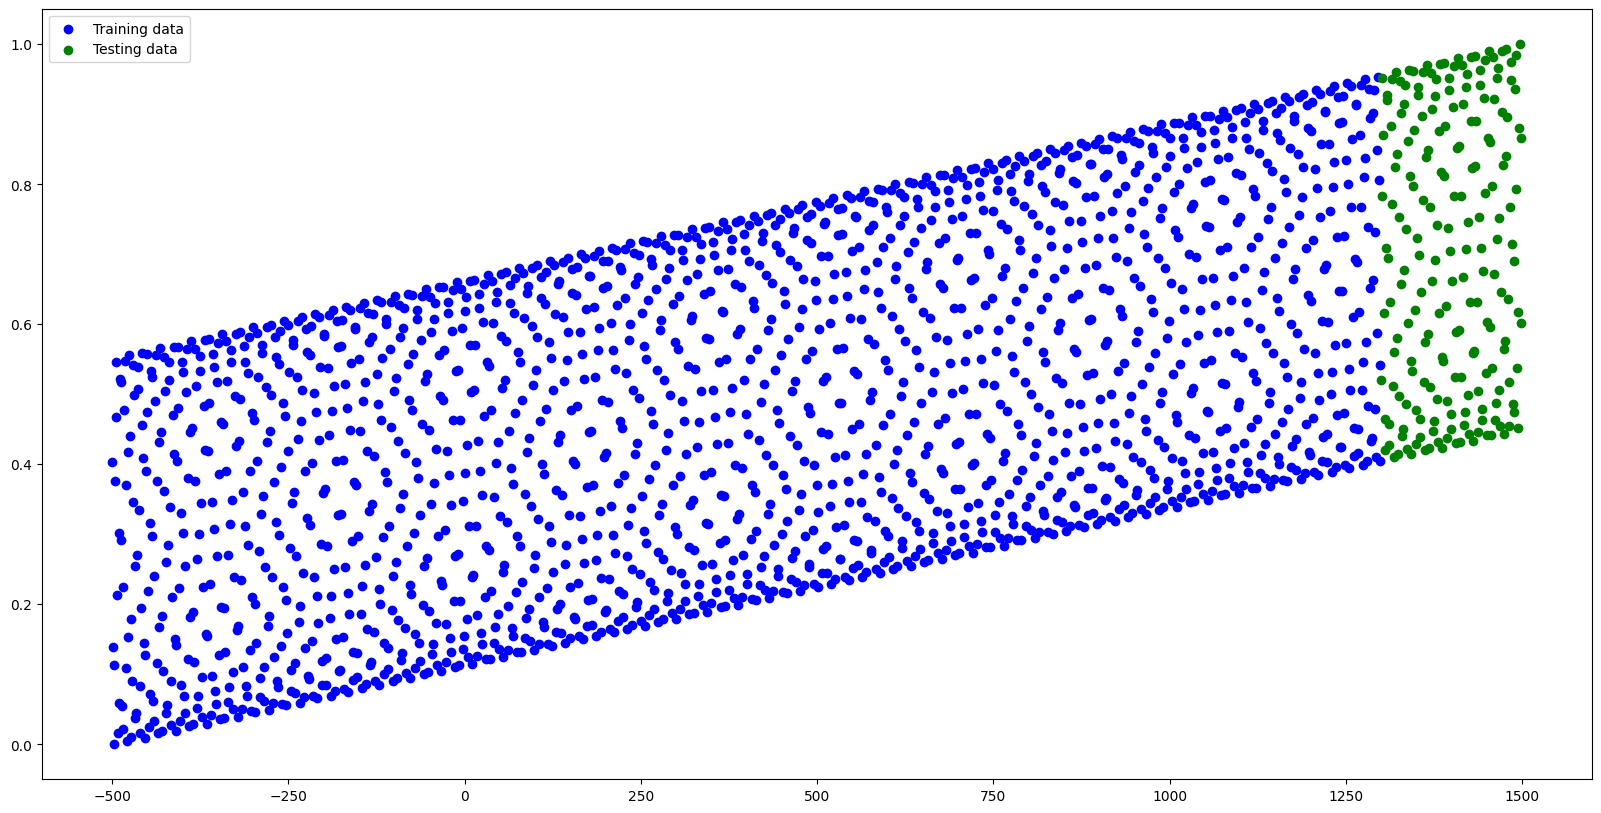

In [316]:
# visualize the separate data of training and test in a graph
plt.figure(figsize=(20,10))
# plot training data in blue
plt.scatter(X_train, y_scaled_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_scaled_test, c='g', label='Testing data')
# Show the legend
plt.legend();

let's try training and testing `model1` with this preprocessed data, to see if our adjustments have made an improvement on the results.

In [327]:
model1.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100


ValueError: Cannot take the length of shape with unknown rank.

there seems to something wrong with the shape. We know that X_train had no issues with fitting on model, but might have to do with y_scaled_train. let's have a look at the shape

In [328]:
print(y_scaled_train.shape), print(X_train.shape)

(1800, 1)
(1800,)


(None, None)

In [332]:
y_scaled_train[:5]

array([[0.40383578],
       [0.1396778 ],
       [0.        ],
       [0.11342847],
       [0.37588455]])

It could be because we are in a 2d array for `y_scaled`, but is normally 1d array for `y`. We'll have to flaten it using `tf.squeeze()`.

In [335]:
y_scaled = tf.squeeze(y_scaled)
y_scaled.shape

TensorShape([2000])

In [336]:
y_scaled_train = y_scaled[:1800]
y_scaled_test = y_scaled[1800:]

model1.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1372.9656 - mae: 1372.9656
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1472.3014 - mae: 1472.3014 
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1475.8826 - mae: 1475.8826 
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1479.4897 - mae: 1479.4897
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1478.4037 - mae: 1478.4037
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1479.4899 - mae: 1479.4899 
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1478.4034 - mae: 1478.4034
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1479.4897 - mae: 1479.4897
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1478.4036 - mae: 1478.4036
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1479.4897 - mae: 1479.4897
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1478.4036 - mae: 1478.4036
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

The normalization doesn't seem to improve on the model's accuracy. Let's see what other ways we can try improve on model accuracy.

I looked at a image exemplar on the list of things one could do to hopefully improve the model's accuracy. One caught my eye on the `optimizer`, where you use `Adam` and set the brackets within with the value of `0.0001`. Let's see if it does anything.

> **Note**: `0.0001` is the `learning rate` for `Adam`. So what is this so called learning rate? It determines the sizes of the steps Adam will take when searching optimal parameters. Too high values will cause predictions to over shoot and fail to converge to on an answer, while too low trains too slow and becomes too cautious.

In [342]:
# Set seet
tf.random.set_seed(35)

# create model, with 4 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 359.1370 - mae: 359.1370
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 356.0981 - mae: 356.0981
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 353.0737 - mae: 353.0737
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 350.0544 - mae: 350.0544
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 347.0374 - mae: 347.0374
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 344.0215 - mae: 344.0215
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 341.0068 - mae: 341.0068
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 337.9925 - mae: 337.9925
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 334.9786 - mae: 334.9786
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 331.9651 - mae: 331.9651
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 328.9519 - mae: 328.9519
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 325.9390 - mae

Seems like our shot in the dark has proved fruitful! The given results are a million times better than before :)

Let's check the results through our test data and visualize in graph.

In [344]:
model2 = model
y_preds2 = model2.predict(X_test)

y_preds2

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


array([[144.28183],
       [144.39322],
       [144.50461],
       [144.61601],
       [144.7274 ],
       [144.83879],
       [144.9502 ],
       [145.06158],
       [145.17297],
       [145.28438],
       [145.39577],
       [145.50716],
       [145.61856],
       [145.72995],
       [145.84134],
       [145.95274],
       [146.06413],
       [146.17552],
       [146.28693],
       [146.39832],
       [146.5097 ],
       [146.62111],
       [146.7325 ],
       [146.84389],
       [146.95528],
       [147.06668],
       [147.17807],
       [147.28946],
       [147.40086],
       [147.51225],
       [147.62364],
       [147.73505],
       [147.84644],
       [147.95782],
       [148.06923],
       [148.18062],
       [148.292  ],
       [148.40341],
       [148.5148 ],
       [148.62619],
       [148.7376 ],
       [148.84898],
       [148.96037],
       [149.07178],
       [149.18317],
       [149.29456],
       [149.40596],
       [149.51735],
       [149.62874],
       [149.74014],


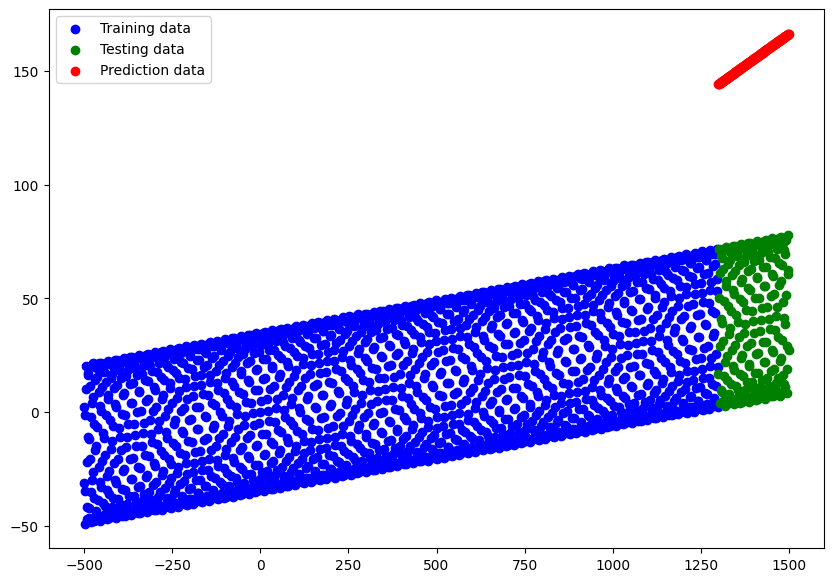

In [345]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds2)

Still a ways away from the true answer, but getting there! Let's see if normalizing will help as well.

#### Model 2

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 57.9060 - mae: 57.9060
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.8951 - mae: 54.8951 
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.8841 - mae: 51.8841
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.8732 - mae: 48.8732
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.8622 - mae: 45.8622
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.8516 - mae: 42.8516
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.8414 - mae: 39.8414
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.8315 - mae: 36.8315
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.8217 - mae: 33.8217
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.8121 - mae: 30.8121
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.8028 - mae: 27.8028
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.7938 - mae: 24.7938
Epoch 13/100

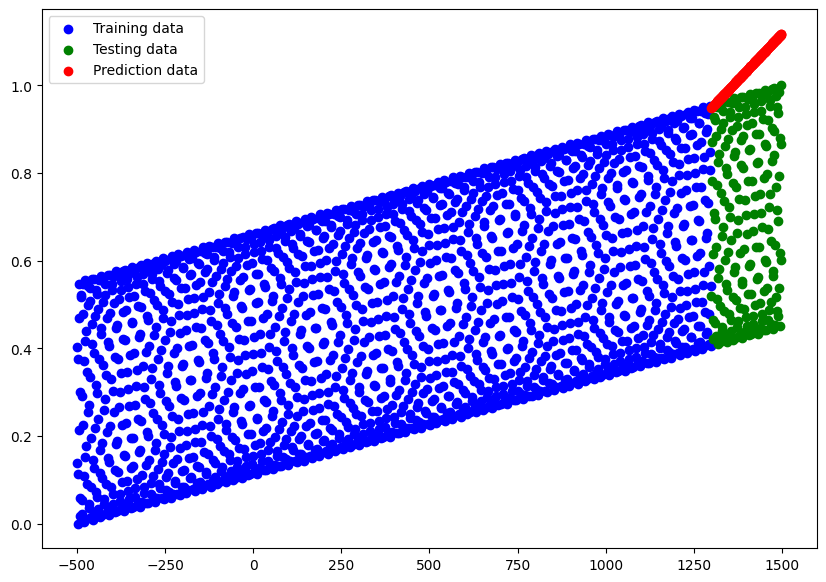

In [346]:
# model predicting on normalized y
model2.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)
# predicting on test data
y_scaled_preds2 = model2.predict(X_test)
# plot our predictions
plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

This time normalization has brought it even closer! But biggest problem of all, it's been displaying this straight line prediction! Not sure why this happens, but we'll try and figure it out with the help of ChatGPT!


**1. Insufficient model complexity**

>Notice how we only have one layer in our `Sequential` portion of the dataset. ChatGPT suggests that our model is too simple and doesn't allow enough complexity for it to discover the actual patterns. Because it only has one neuron, the most it can do is basically predict linear patterns!

**2. Activation function issues**

>If our layers only contain activation functions that only seeks simple linear patterns, then it'll definitely not be able to find out the non-linear patterns of this data! So we have to ensure that we're using nonlinear activations.

**3. Normalizing X**

>Sometimes, normalizing just one result may not help the ML model, and you'll have to do it for both X and y data sets.

**4. Loss function choice**

>The main two we see is `MSE (Mean Squared Error)`, and `MAE (Mean Absolute Error)`. And we currently have MAE in use in our model. ChatGPT suggests that MSE works better on normalized data compared to MAE.

**5. Learning rate too high**

>Our Adam function might be overshooting the optimal solution, and may need to decrease the learning rate.

**6. Insufficient training/Overfitted on linear components**

>The model might have not trained long enough to find the pattern, and also may need to require an `early stopping` function, to prevent mode from over fitting too much.

Given the list of possible things to debug, we will go down the list one by one, and see how it affects the results when compared to `model2`, which we'll treat as our baseline.

#### 1. Insufficient Model Complexity

In [352]:
# Set seet
tf.random.set_seed(35)

# create model, with 4 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 36.7993 - mae: 36.7993
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2710 - mae: 1.2710
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2505 - mae: 0.2505
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2283 - mae: 0.2283
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2153 - mae: 0.2153
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2053 - mae: 0.2053
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1957 - mae: 0.1957
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1939 - mae: 0.1939
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1931 - mae: 0.1931
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1980 - mae: 0.1980
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1892 - mae: 0.1892
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1927 - mae: 0.1927
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━

#### Model 3

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(None, None)

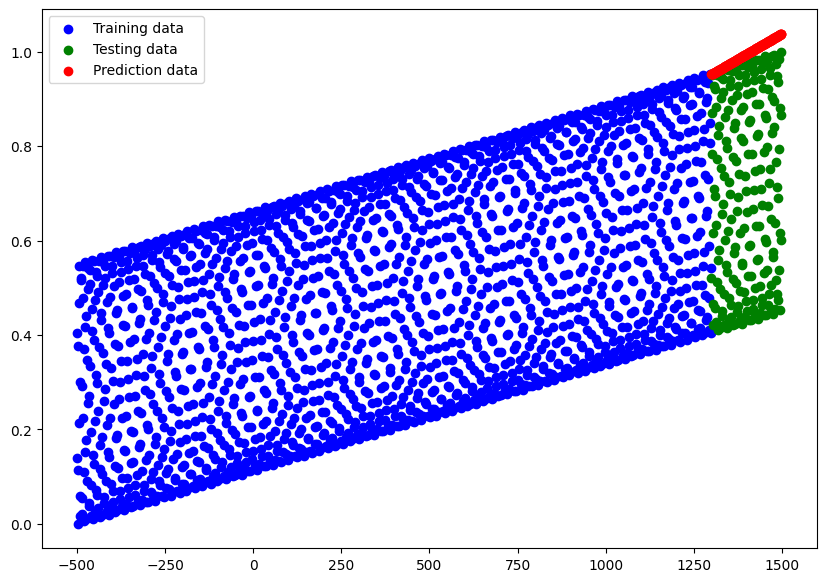

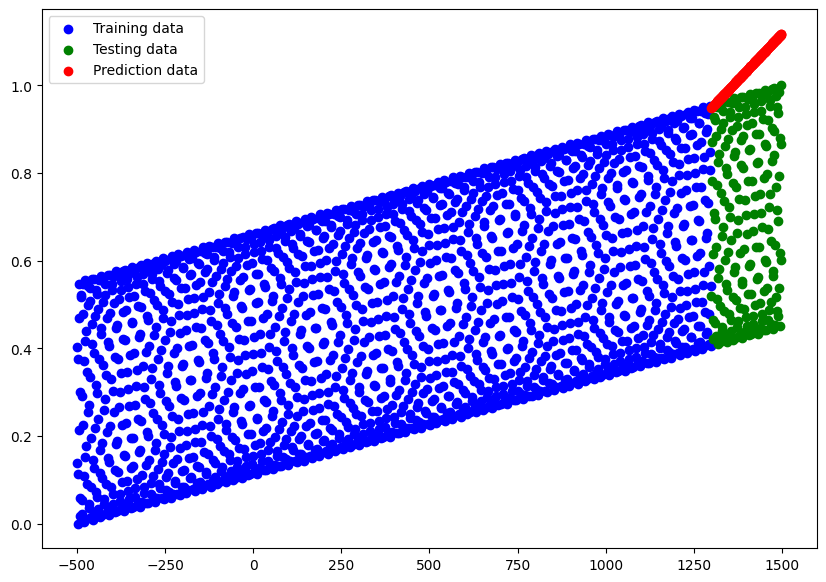

In [353]:
y_scaled_preds3 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds3), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

Adding complexity to the model has helped increase accuracy, but has not fixed our largest issue, linearity in predictions. We've also seem to have fixed our previous issue with `Nan` results on our `mae`.

#### 2. Activation function issues

I've asked ChatGPT a list of nonlinear activation function that i can implement into the model, and here are the list that it has provided:

**1. Rectified Linear Unit (ReLU)**: Most often used for deep learning, effecient and mitigates vanishing gradient problems.

**2. Leaky ReLU**: Solves dying ReLU (where neuron outputs zero for every input) by allowing small negative gradients

**3. Parametrics ReLU (PReLU)**: Adds flexibility to Leaky ReLU, by learning slopes of the negative region

**4. Exponential Linear Unit (ELU)**: Used to improve convergence and mitigate vanishing gradients

**5. Swish**: Outperforms ReLU on deeper networks

**6. Sigmoid**: Common for output layers in binary classifications

**7. Tanh (Hyperbolic Tangent)**: Often used in hidden layers for data centered at zero

**8. Softmax**: Output layer for multi-class classification

**9. GELU (Gaussian Error Linear Unit)**: Popular in transformer models (e.g. BERT)

**10. Softplus**: Nonliner alternative to ReLU

**11. Maxout**: Provides learnable piecewise linearity, often outperforming ReLU

**12. Sinusoidal Activation**: Rarely used but suitable for periodic data or in Fourier-related models

**Glossary because there are terms I don't understand**:

> Vanishing gradient: *Where gradients become very small, and prevents networks from learning effectively. If it happens early, then layers further down don't work.*

> Negative gradient: *Weights have increased too much, causing dead neurons, and reduces the amount of learning.*

> Negative region: *Outputs negative values, helps network with modelling more diverse relationships.*

> Improve convergence: *Makes model learn faster*

> Hidden layers: *Layers between the input and output layers, processing and extracting features from data.*

> Transformer Models: *Neural Network Architecture designed to handle sequential data, e.g. natural laguage processing.*

> Piecewise linearity: *Functions compoased of multiple linear segments, allows approximation on nonlinear relationships.*

> Fourier-related models: *Model leveraging fourier transforms, useful for modelling periodic or oscillatory patterns in data (e.g. sine waves).*

#### What should we try?

**Parametrics ReLU**: ReLU is common used for deep learning, thinking parametrics would be good. Theorized the flexibility would help with the complexity of data

**Exponential Linear Unit**: Want to utilize improvement on convergence, and minimize vanishing gradient

**Softplus**: Utilize non linearity of model, as it fits the data I've formulated

**Maxout**: Utilize its non linear finding relationships, and its outperformance of ReLU

**Sinusoidal Activation**: Suited for periodic/oscillatory patterns. Perfect for the sine wave in the data

#### ChatGPT consultation

I wasn't sure how to implement those layers into our sequential layer model, so I decided to ask ChatGPT for such code. Though it did return quite a bit of code for `Maxout`. I want to try and understand the code that ChatGPT has outputted, but figure to leave `Maxout` for next time, as there's a lot of things I'm not sure how to interpret.

```python
# Custom Maxout Layer
class Maxout(tf.keras.layers.Layer):
    def __init__(self, num_units, num_pieces):
        super(Maxout, self).__init__()
        self.num_units = num_units
        self.num_pieces = num_pieces

    def build(self, input_shape):
        self.weights = self.add_weight(
            shape=(input_shape[-1], self.num_units * self.num_pieces),
            initializer="glorot_uniform",
            trainable=True,
        )
        self.biases = self.add_weight(
            shape=(self.num_units * self.num_pieces,),
            initializer="zeros",
            trainable=True,
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.weights) + self.biases
        z = tf.reshape(z, [-1, self.num_units, self.num_pieces])
        return tf.reduce_max(z, axis=-1)

```

I decided to add all those different activation function, since it'll take a while to go through all of them, and was curious how all these work together.

In [355]:
from tensorflow.keras.layers import Dense, PReLU, ELU, Activation, Lambda

# Set seed
tf.random.set_seed(35)

# Custom Sinusoidal Activation Function
def sinusoidal(x):
    return tf.sin(x) # takes x, and applies sine to said x. Meant to introduce periodic behaviour into the model's actions, aka sine waves.

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),  # Input Layer of 128 neurons
    # 1. PReLU Activation
    PReLU(),

    # 2. ELU Activation
    Dense(128),  # Fully connected layer to the previous layer of 128 neurons
    ELU(alpha=1.0),

    # 3. Softplus Activation
    Dense(128),
    Activation('softplus'),

    # 4. Sinusoidal Activation
    Dense(128),
    Lambda(sinusoidal), # applying Siusoidal activation using Lambda. Lanbda allows the use of arbitrary functions as an activation. In our example, it applies the sine function to the output of the dense layer.

    # Output Layer
    Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100



57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 0.6986 - mae: 0.6986
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4801 - mae: 0.4801
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5120 - mae: 0.5120
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4626 - mae: 0.4626
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4071 - mae: 0.4071
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4131 - mae: 0.4131
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4763 - mae: 0.4763
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4268 - mae: 0.4268
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4109 - mae: 0.4109
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3942 - mae: 0.3942
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4207 - mae: 0.4207
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4128 - mae: 0.4128
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

#### Model 4

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


(None, None)

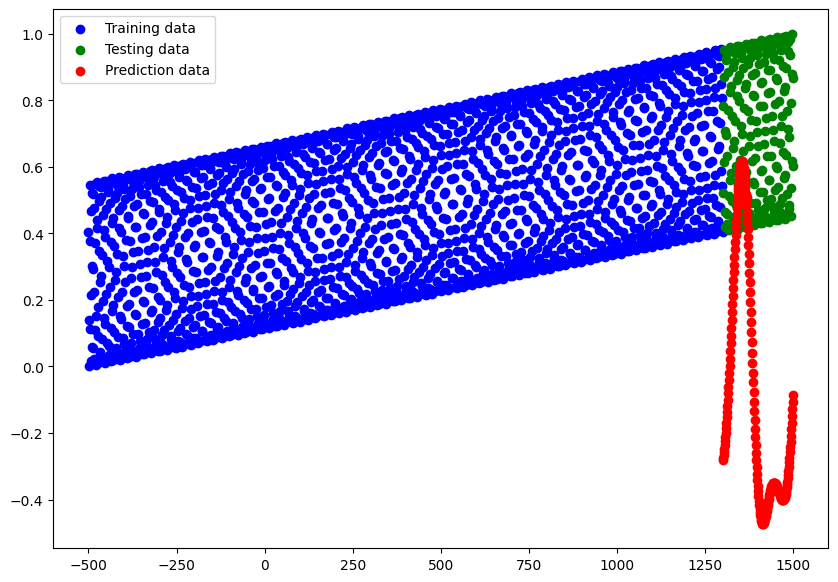

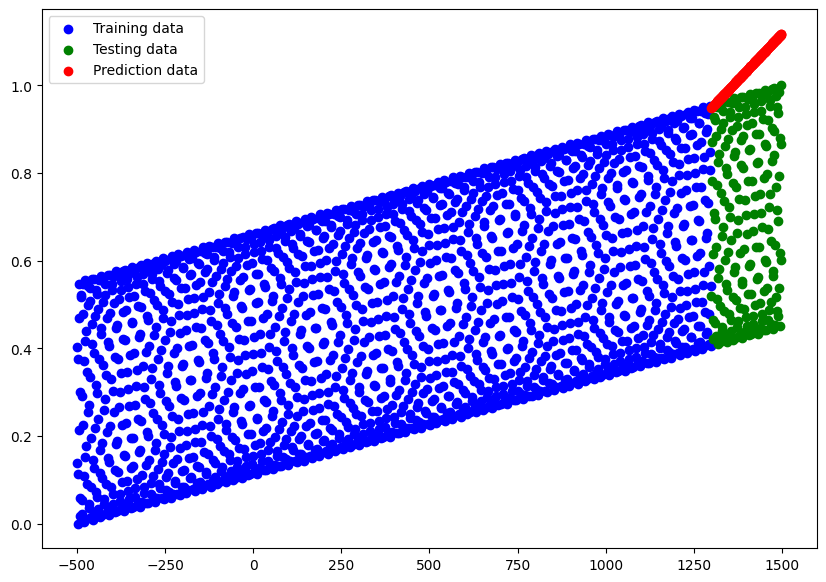

In [356]:
y_scaled_preds4 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds4), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

We've fixed the issue of linear results in the data, which is a good step. But it has picked negative values, which our y-values don't have. We can figure that out through our list of activation functions.

#### 3. Normalize X

like y, let's normalize x and see what it does.

In [357]:
X_scaled = scaler.fit_transform(tf.expand_dims(X, axis=-1)) # fit our scaler function onto y, and expand y from 1D to 2D array to not cause error
X_scaled

X_scaled_train = X_scaled[:1800]
X_scaled_test = X_scaled[1800:]

In [358]:
tf.random.set_seed(35)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_scaled_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2695 - mae: 0.2695
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2671 - mae: 0.2671
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2649 - mae: 0.2649
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2629 - mae: 0.2629
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2611 - mae: 0.2611
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2594 - mae: 0.2594
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2579 - mae: 0.2579
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2565 - mae: 0.2565
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2551 - mae: 0.2551
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2539 - mae: 0.2539
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2527 - mae: 0.2527
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2516 - mae: 0.2516
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━━

#### Model 5

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(None, None)

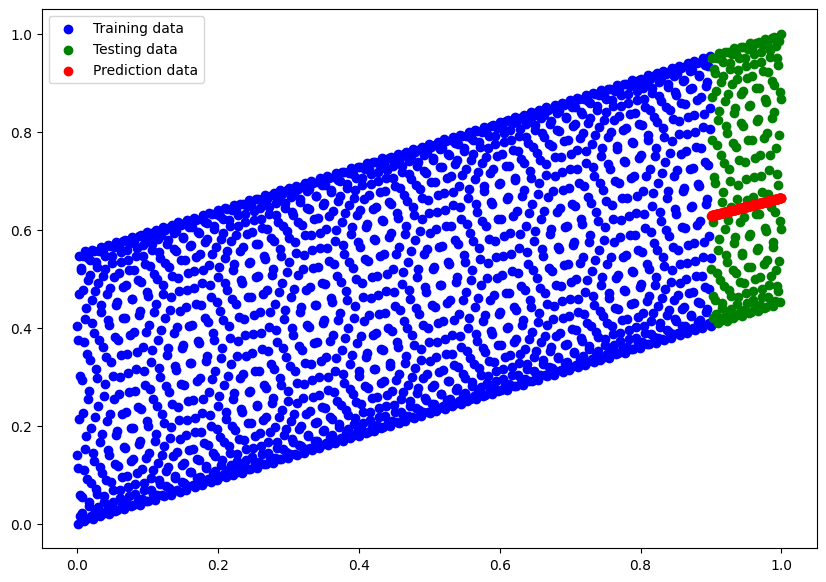

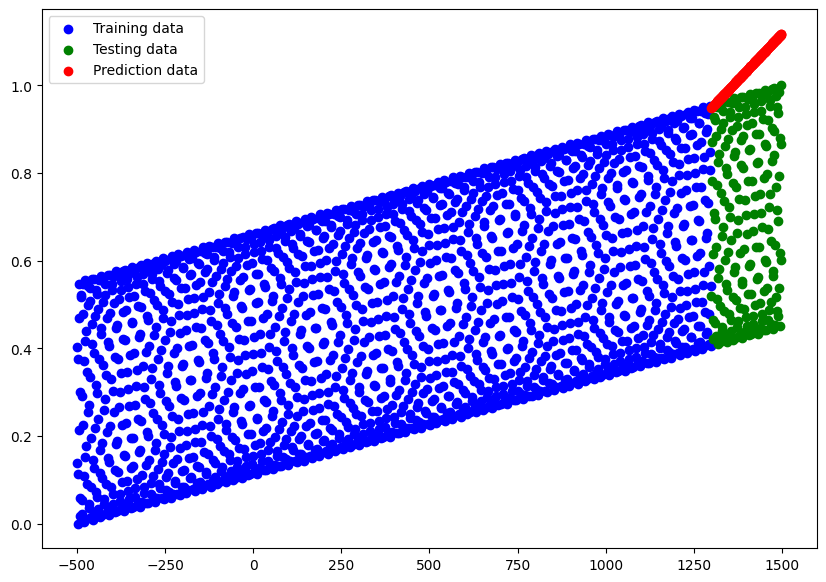

In [359]:
y_scaled_preds5 = model.predict(X_scaled_test)

plot_predictions(X_scaled_train, y_scaled_train, X_scaled_test, y_scaled_test, y_scaled_preds5), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

The predictions is even better! Despite it being a linear prediction, it's lining up quite close to the mean of the values.

#### 4. Loss Function Choice

Instead of using `mae`, we'll use `mse`.

In [376]:
tf.random.set_seed(35)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['mse'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 822.0550 - mse: 1015611.4375  
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 819.0159 - mse: 1008115.5625
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 815.9914 - mse: 1000682.9375
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 812.9722 - mse: 993291.1250
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 809.9550 - mse: 985931.3125
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 806.9395 - mse: 978602.9375
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 803.9246 - mse: 971303.6250
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 800.9103 - mse: 964032.9375
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 797.8965 - mse: 956790.5000
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 794.8830 - mse: 949576.3125
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 791.8698 - mse: 942390.2500
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━

#### Model 6

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


(None, None)

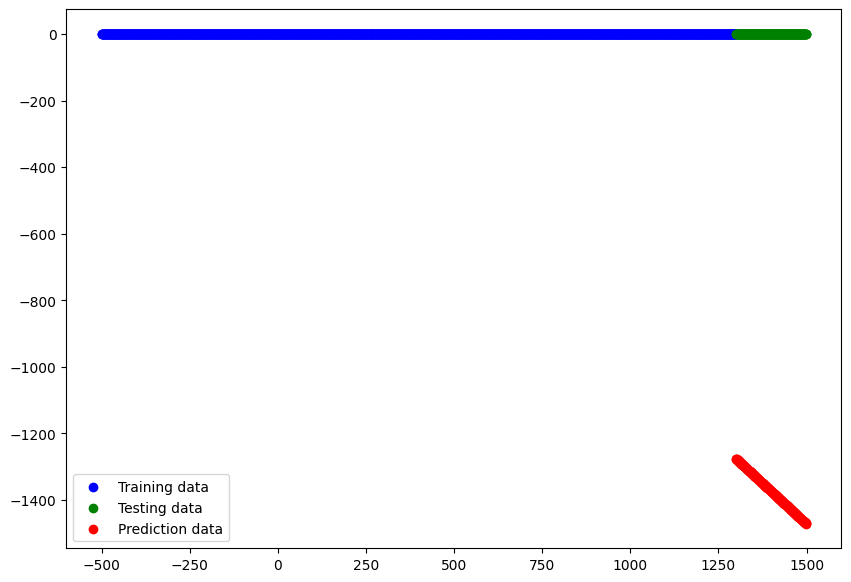

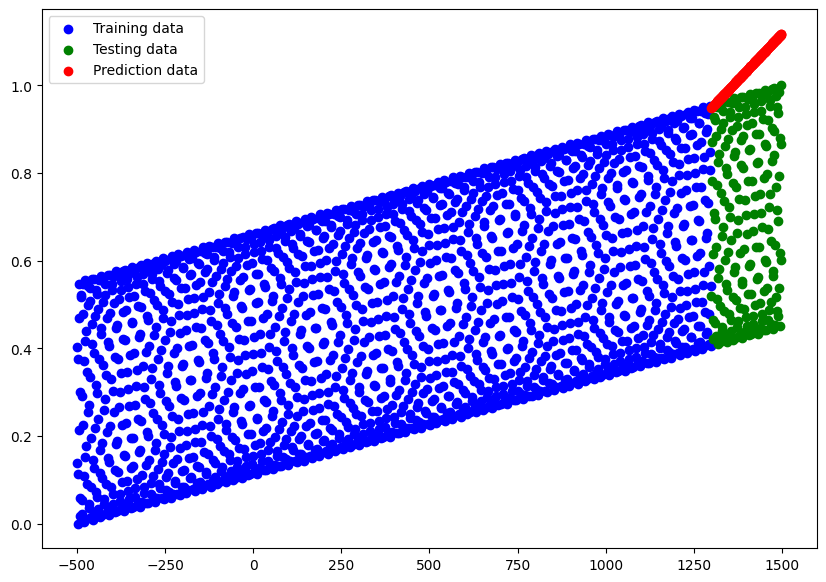

In [377]:
y_scaled_preds6 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds6), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

`MSE` seemed to make the prediction worse, so we'll keep it to `MAE`.

#### 5. Learning rate too high

We will decrease adam's learning rate

In [381]:
tf.random.set_seed(35)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177.9045 - mae: 177.9045  
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147.5139 - mae: 147.5139
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117.2692 - mae: 117.2692
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.0759 - mae: 87.0759
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9055 - mae: 56.9055
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.7487 - mae: 26.7487
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5380 - mae: 1.5380
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1874 - mae: 0.1874
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1810 - mae: 0.1810
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1806 - mae: 0.1806
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1871 - mae: 0.1871
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1913 - mae: 0.1913
Epoch 13/100
57/5

#### Model 7

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


(None, None)

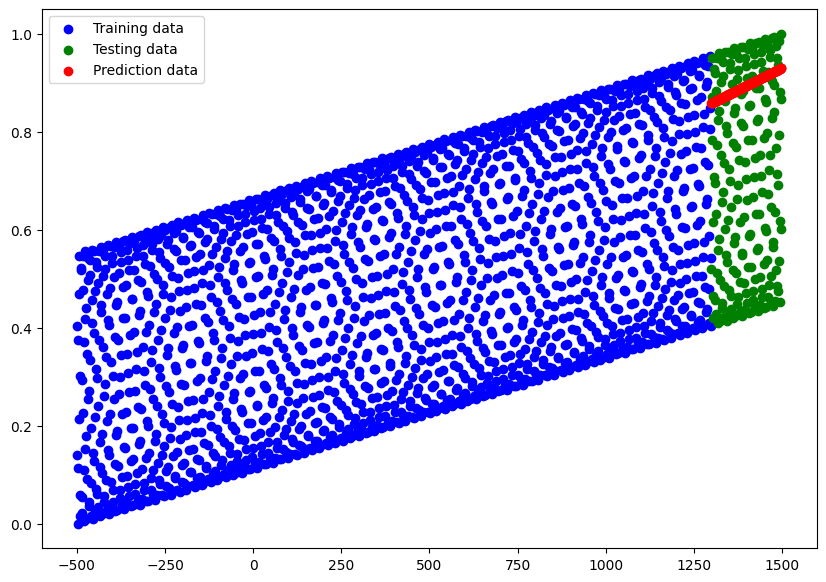

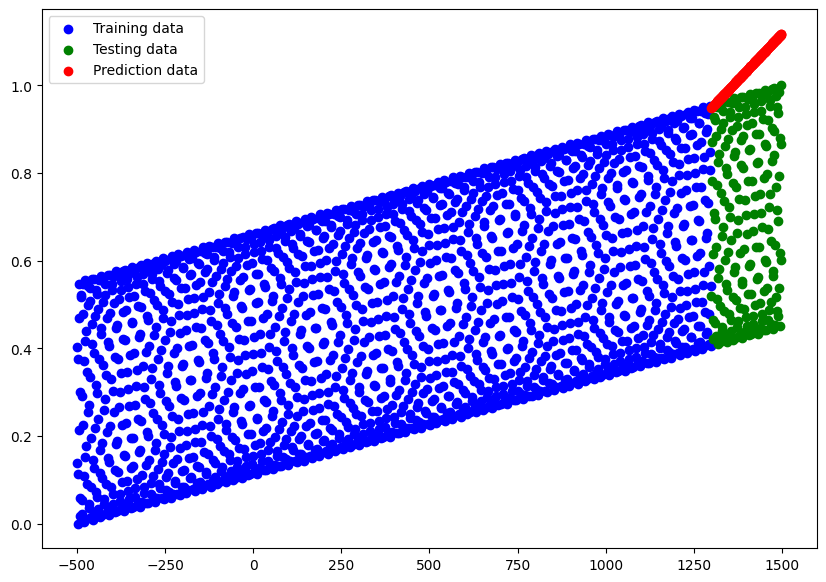

In [382]:
y_scaled_preds7 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds7), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

Again, a small bit of improvement.

#### 6. Insufficient training/Overfitting on linear components

Let's try pulling up the number of epochs, by increasing the amount to train.

In [379]:
tf.random.set_seed(35)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=500)

Epoch 1/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 580.7787 - mae: 580.7787  
Epoch 2/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 577.7396 - mae: 577.7396
Epoch 3/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 574.7151 - mae: 574.7151
Epoch 4/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 571.6959 - mae: 571.6959
Epoch 5/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 568.6787 - mae: 568.6787
Epoch 6/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 565.6632 - mae: 565.6632
Epoch 7/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 562.6484 - mae: 562.6484
Epoch 8/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 559.6341 - mae: 559.6341
Epoch 9/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 556.6202 - mae: 556.6202
Epoch 10/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 553.6066 - mae: 553.6066
Epoch 11/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 550.5936 - mae: 550.5936
Epoch 12/500
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 547.5806 - m

#### Model 8

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


(None, None)

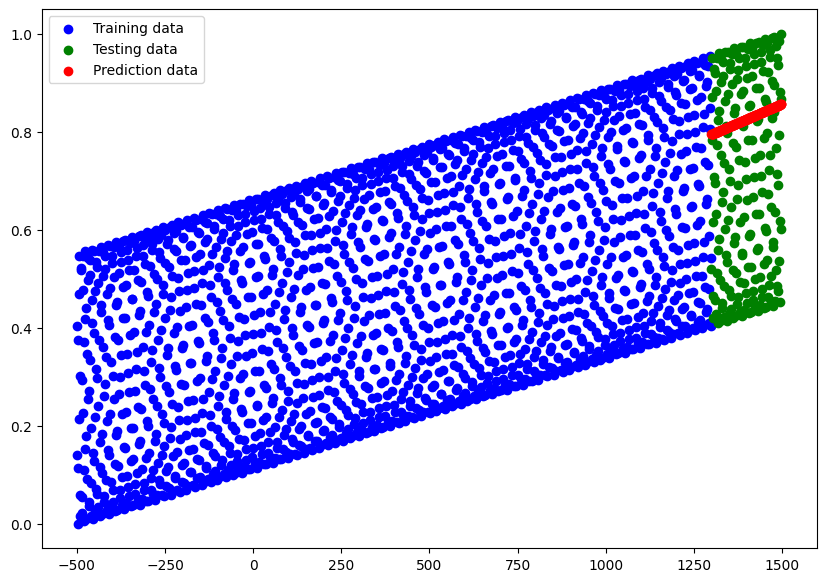

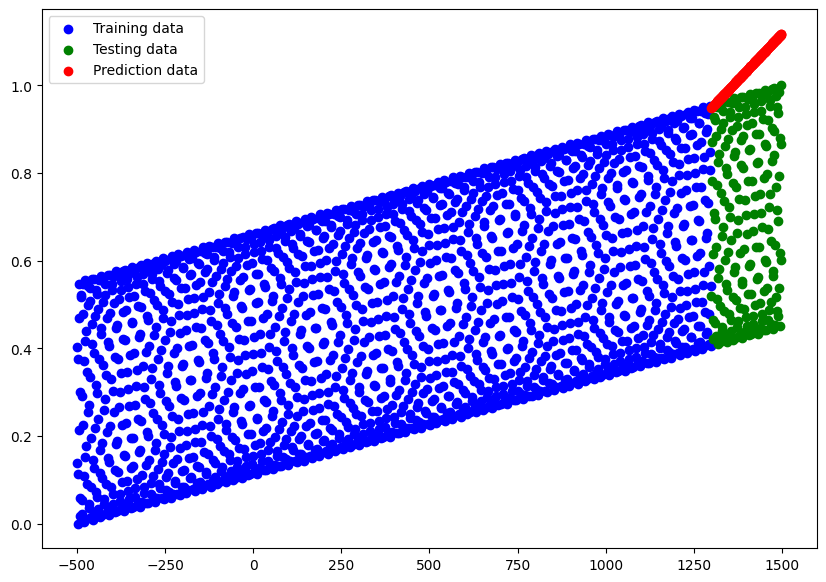

In [380]:
y_scaled_preds8 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds8), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

Again, a very slight improvement on the prediction. This might only be substantial on models that lack complexity.

These experimentation povides some very fruitful qualities that leads closer to the answer. Let's try and fit all the improvement qualities into one model, and see its output.

The list of stuff to implement all together:

**1. Insufficient model complexity**

**2. Activation function issues**

**3. Normalizing X**

**5. Learning rate too high**

In [383]:
# combine all improvement qualities into one model
from tensorflow.keras.layers import Dense, PReLU, ELU, Activation, Lambda

tf.random.set_seed(35)

def sinusoidal(x):
    return tf.sin(x)

# Create the model with multiple layers, and multiple nonlinear activation functions
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    PReLU(),

    Dense(128),
    ELU(alpha=1.0),

    Dense(128),
    Activation('softplus'),

    Dense(128),
    Lambda(sinusoidal),

    Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # minimized learning rate of Adam
    metrics=['mae']
)

model.fit(tf.expand_dims(X_scaled_train, axis=-1), y_scaled_train, epochs=100) # train on X_scaled_train

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 0.4991 - mae: 0.4991
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2031 - mae: 0.2031
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2033 - mae: 0.2033
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2041 - mae: 0.2041
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2079 - mae: 0.2079
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2044 - mae: 0.2044
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2034 - mae: 0.2034
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2033 - mae: 0.2033
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2041 - mae: 0.2041
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2053 - mae: 0.2053
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2060 - mae: 0.2060
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2056 - mae: 0.2056
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


(None, None)

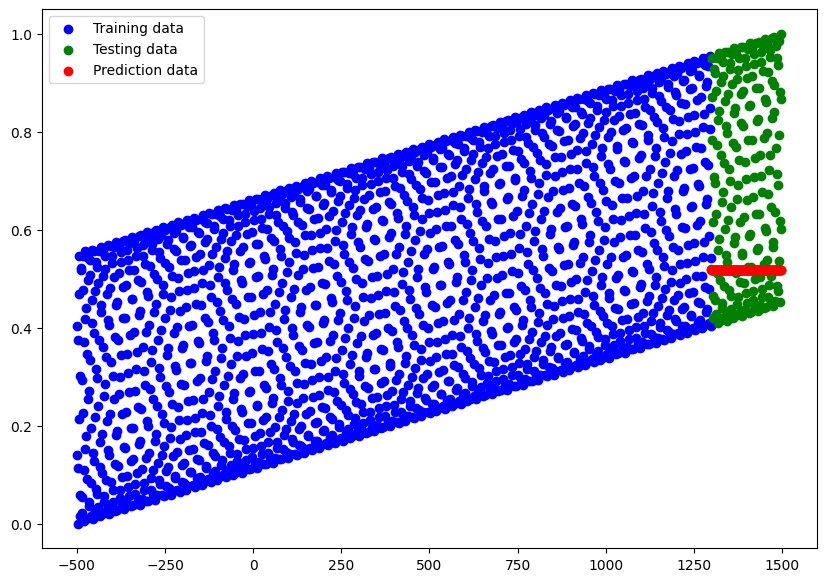

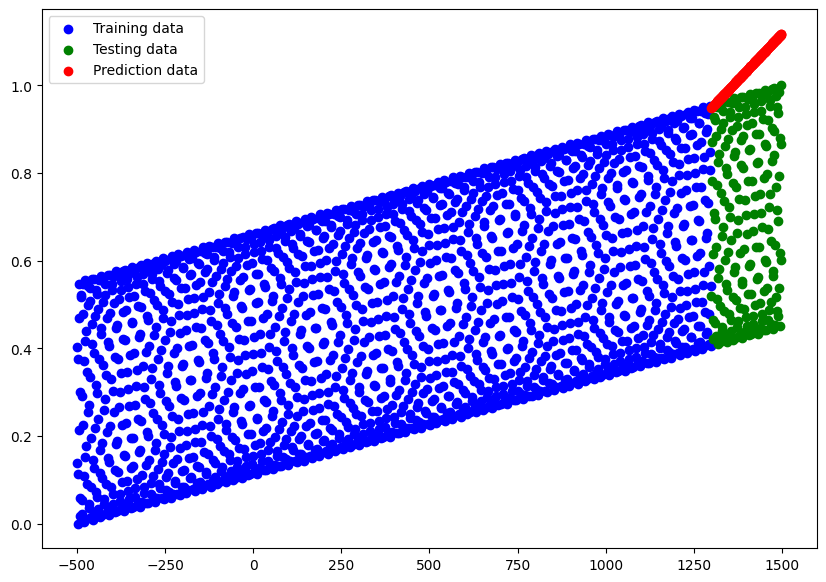

In [384]:
y_scaled_preds9 = model.predict(X_scaled_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds9), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds2)

Hmmm... this isn't helpful. Where did the curviness of the nonlinear activations go?

I'll pull back model 4, where we did the nonlinear activations in the model. See how we can manipulate it to become more accurate.

In [385]:
from tensorflow.keras.layers import Dense, PReLU, ELU, Activation, Lambda

# Set seed
tf.random.set_seed(35)

# Custom Sinusoidal Activation Function
def sinusoidal(x):
    return tf.sin(x)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),  # Input Layer
    # 1. PReLU Activation
    PReLU(),

    # 2. ELU Activation
    Dense(128),  # Fully connected layer
    ELU(alpha=1.0),

    # 3. Softplus Activation
    Dense(128),
    Activation('softplus'),

    # 4. Sinusoidal Activation
    Dense(128),
    Lambda(sinusoidal),

    # Output Layer
    Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.6349 - mae: 0.6349
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4628 - mae: 0.4628
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3941 - mae: 0.3941
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4280 - mae: 0.4280
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4576 - mae: 0.4576
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4802 - mae: 0.4802
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3830 - mae: 0.3830
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4388 - mae: 0.4388
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4034 - mae: 0.4034
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3917 - mae: 0.3917
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4260 - mae: 0.4260
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4353 - mae: 0.4353
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


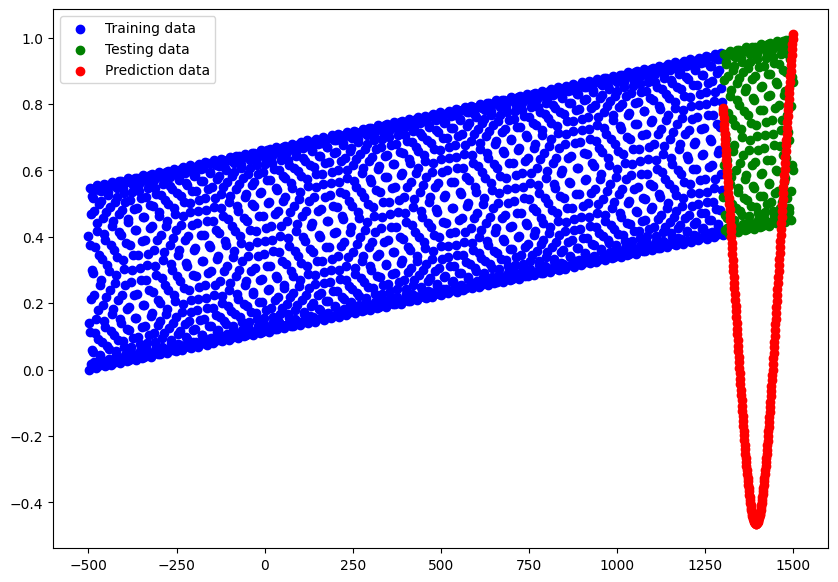

In [386]:
y_scaled_preds4 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds4)

Let's remove one nonlinear activations at a time and see which brings the model closer to ideal.

In [395]:
from tensorflow.keras.layers import Dense, PReLU, ELU, Activation, Lambda

# Set seed
tf.random.set_seed(35)

# Custom Sinusoidal Activation Function
def sinusoidal(x):
    return tf.sin(x)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),  # Input Layer
    # 1. PReLU Activation
    PReLU(),

    # 3. Softplus Activation
    Dense(128),
    Activation('softplus'),

    # 4. Sinusoidal Activation
    Dense(128),
    Lambda(sinusoidal),

    # Output Layer
    Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7737 - mae: 0.7737
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6274 - mae: 0.6274
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5397 - mae: 0.5397
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5074 - mae: 0.5074
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4809 - mae: 0.4809
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5182 - mae: 0.5182
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5669 - mae: 0.5669
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5287 - mae: 0.5287
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4863 - mae: 0.4863
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5142 - mae: 0.5142
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4929 - mae: 0.4929
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4797 - mae: 0.4797
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━━

#### Model 10

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


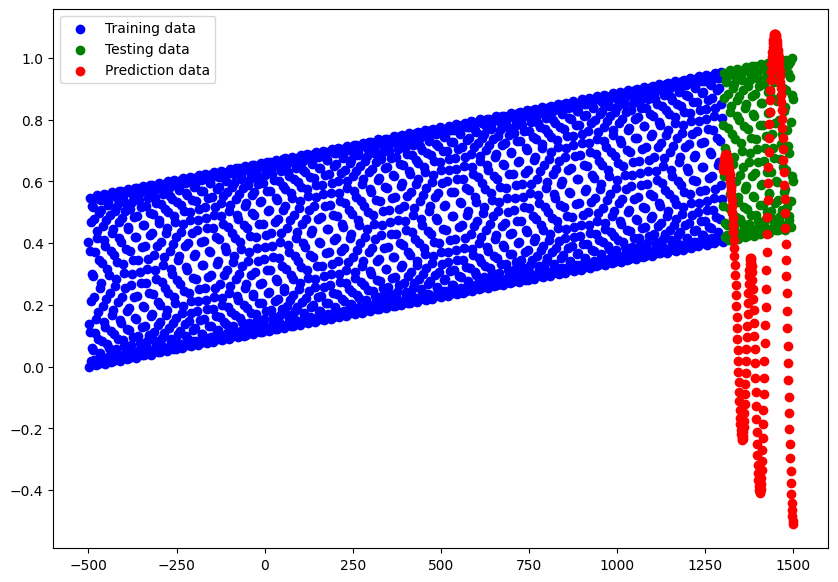

In [396]:
y_scaled_preds10 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds10)

ELU seemed to bring a negative prediction values, so I've removed it from the model as it improves the chances of the values aligning with the truth values. So now I wondered, whether the multiple nonlinear activation layers are inteferring with the other layers?

In [403]:
from tensorflow.keras.layers import Dense, PReLU, ELU, Activation, Lambda

# Set seed
tf.random.set_seed(35)

# Custom Sinusoidal Activation Function
def sinusoidal(x):
    return tf.sin(x)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),  # Input Layer
    # 1. PReLU Activation
    PReLU(),
    
    # 4. Sinusoidal Activation
    Dense(128),
    Lambda(sinusoidal),

    # Output Layer
    Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7452 - mae: 0.7452
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5643 - mae: 0.5643
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5210 - mae: 0.5210
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5435 - mae: 0.5435
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4651 - mae: 0.4651
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5202 - mae: 0.5202
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4379 - mae: 0.4379
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4667 - mae: 0.4667
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4632 - mae: 0.4632
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4745 - mae: 0.4745
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4780 - mae: 0.4780
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4729 - mae: 0.4729
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━━

#### Model 11

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


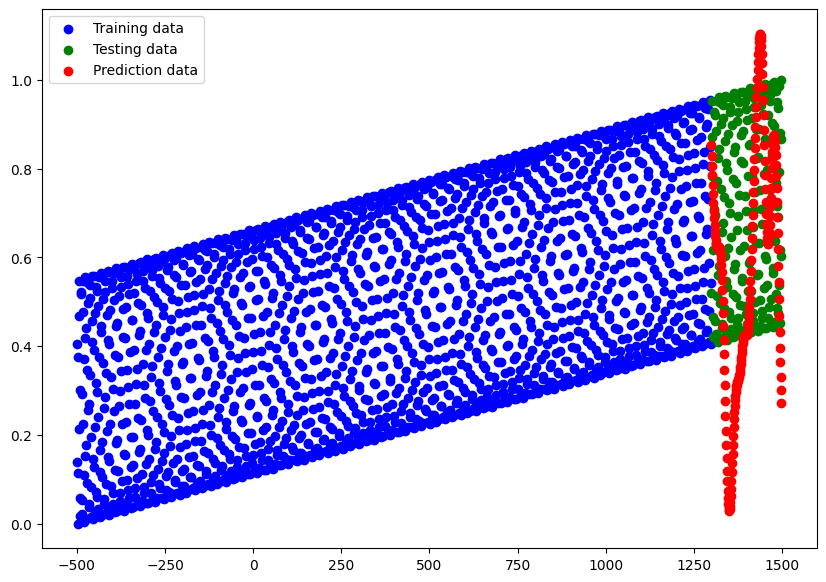

In [404]:
y_scaled_preds11 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds11)

Seems removing `softplus` has yieled closer results. And I also found out that `sinusoidal` has proved very effective in prediction. As without it, it causes the model to predict linearly.

There's going to be a lot of fiddling, so I'll list all the changes I've made in sequential order, and what changed in the predictions:

<span style="color: green;"> **1. Remove PreLU layer**: More prediction points overlaying the truth labels, also less negative prediction values. *Loss: 0.2019*</span>  

<span style="color: green;"> **2. Move PreLU under Sinusoidal**: Prediction values don't follow a visible line, with more vareity. It's getting close to the variety needed to predict the truth values. *Loss: 0.1755*</span>  

<span style="color: green;"> **3. Softmax 128 neurons under PreLU, and under Sinusoidal**: Prediction values are less spread, and starts congregating an area of the value predictions. Get's closer to truth values. *Loss: 0.1784*</span>  

<span style="color: green;"> **4. Softmax neurons reduced to 64**: Not much different than when it had 128 neurons. *Loss: 0.1740*</span>  

<span style="color: yellow;"> **5. *CHANGED* Sinusoidal neurons to 256**: Loss is tiny bit higher, but values is similar to when it had 128 Neurons. *Loss: 0.1801*</span>  

<span style="color: red;"> **6. *REMOVED* Add ELU with 128 neurons at the last layer**: Slight decrease in accuracy. *Loss: 0.1801*</span>  

<span style="color: red;"> **7. *REMOVED* ELU 256 neurons placed as first layer**: Within data range, but its variety in values is not wide enough. *Loss: 0.1937*</span>  

<span style="color: red;"> **8. *REMOVED* ELU with 512 neurons instead**: Reduced accuracy. *Loss: 0.1943*</span>  

<span style="color: red;"> **9. *REMVOED* ELU with 512 neurons is replaced with Sinusoidal**: Slight reduced accuracy. Seems like ELU doesn't work with our prediction goals. *Loss: 0.1825*</span>  

<span style="color: yellow;"> **10. *CHANGED* Increase Sinusoidal 256 > 512, and PreLU 128 > 256**: Variety of data prediction shrank, not ideal. *Loss: 0.1840*</span>  

<span style="color: green;"> **11. New Sinusoidal 128 neurons betwwen PreLU, and Softplus**: No difference than the previous. *Loss: 0.1583*</span>  

<span style="color: yellow;"> **12. *CHANGED* Sinusoidal returns from 512 > 256, and PreLU 256 > 128 while keeping the new Sinusoidal 128**: Lack of variety in value for data prediction. *Loss: 0.1792*</span>  

<span style="color: green;"> **13. Set Sinusoidal, PreLU, and new Sinusoidal layers to 128 neurons**: Values and loss getting a tiny bit smaller. Predicted values trend smaller the bigger X got. *Loss: 0.1713*</span>  

<span style="color: green;"> **14. Set first Sinusoidal neurons to 64 from 128 neurons**: Similar results, getting very slight improvement. Same issue with values trending smaller. *Loss: 0.1705*</span>  

<span style="color: green;"> **15. Add a new Sinusoidal 128 neuron layer, between first Sinusoidal 128 layer, and PreLU 128 layer**: Loss reduced, value trend increases as X gets bigger which is what I'm looking for. *Loss: 0.1553*</span>  

<span style="color: green;"> **16. Another new Sinusoidal 128 layers, between 1st and 2nd layer**: Loss reduced, similar results to previous step. *Loss: 0.1358*</span>  

<span style="color: green;"> **17. Another new Sinusoidal 128 layer in a bunch of Sinusoidal layers**: Accuracy don't seem to improve. *Loss: 0.1202*</span>  

<span style="color: yellow;"> **18. *CHANGED* New Sinusoidal 64 layer between layer 4 and 5**: Accuracy reduced slightly, with somewhat heavy variety. *Loss: 0.1384*</span>  

<span style="color: green;"> **19. Move new Sinusoidal 64 layer to the first layer**: Accuracy has improved quite significantly. *Loss: 0.0736*</span>  

<span style="color: green;"> **20. New Sinusoidal 32 layer to the first layer**: Accuracy improved. *Loss: 0.0511*</span>  

<span style="color: green;"> **21. New Sinusoidal 16 layer to the first layer**: Accuracy unchanged. *Loss: 0.0511*</span>  

<span style="color: red;"> **22. *REMOVED* Reduce Sinusoidal 16 neurons to 8 neurons in first layer**: Accuracy reduced. *Loss: 0.1336*</span>  

<span style="color: green;"> **23. Increase Sinusoidal in layer 5 from 128 to 256 neurons**: Accuracy is better. *Loss: 0.0484*</span>  

<span style="color: red;"> **24. *REMVOED* Increase Sinusoidal in layer 6 from 128 to 256 neurons**: Accuracy reduced. *Loss: 0.0579*</span>  

<span style="color: green;"> **25. New PreU 64 neuron layer between layer 8 and layer 9**: Accuracy increased. *Loss: 0.0331*</span>  

<span style="color: green;"> **26. New Softplus 64 layer between layer 7 and layer 8**: Accuracy increased. Found a pattern of Siusoidal > PreLU > softplus activation layers, where neurons are the same number. *Loss: 0.0323*</span>  

<span style="color: red;"> **27. *REMOVED* New Sinusoidal > PreLU > softplus layer with 32 neurons, placed behind the last layer**: Accuracy has reduced. *Loss: 0.0394*</span>  

<span style="color: red;"> **28. *REMOVED* New Sinusoidal 64 layers between layer 8 and 9**: Accuracy is not really improved. *Loss: 0.0381*</span>  

<span style="color: green;"> **29.New softplus 32 neuron layer placed behind the last layer**: Accuracy not changed much. *Loss 0.0364*</span>  

<span style="color: red;"> **30. *REMOVED* New Softplus 16 neuron layer placed behind the last layer**: Reduced accuracy. *Loss: 0.0559*</span>  

<span style="color: yellow;"> **31. *CHANGED* Swap MAE to MSE in metrics**: Improvement is minimal. *Loss: 0.0395*</span>  

<span style="color: yellow;"> **32. *CHANGED* Increase learning rate**: Improvement decreased. *Loss: 0.1974*</span>  

<span style="color: yellow;"> **33. *CHANGED* Use X_scaled_train over X_train**: Improvement decreased, and becomes linear prediction for some reason. *Loss: 0.1971*</span>  

<span style="color: yellow;"> **34. *CHANGED* Use y_train over y_scaled_train**: Hard to evaluate as loss is different due to unscaled prediction value, but looks pretty similar in range of predictions.</span>  

<span style="color: green;"> **35. Add new PreLU with 16 neuron layer behind the last layer**: Loss has been reduced. *Loss: 0.0313*</span>  

<span style="color: green;"> **36. Add new Sinusoidal with 16 neuron layer behind the last layer**: Despite loss is higher, the model is getting quite close in mapping out the general boundary of the truth values. *Loss: 0.0391*</span>  

<span style="color: green;"> **37. Add new softplus with 16 neuron layer behind the last layer**: Surprised to see better accuracy and also mapping out general boundary. *Loss: 0.0272*</span>  

<span style="color: red;"> **38. *REMOVED* Add PreLU > Sinusoidal > Softplus with 8 neurons behind the last layer**: Did not improve accuracy. *Loss: 0.0342*</span> 

<span style="color: yellow;"> **39. *CHANGED* Reduce learning rate**: Accuracy is decreased and variety has shrunk. *Loss: 0.0571*</span>  

I think I've found the most optimal model and layering so fat, and the code underneath this wall of text is the final model.</span>  

In [566]:
from tensorflow.keras.layers import Dense, PReLU, Activation, Lambda

# Set seed
tf.random.set_seed(35)

# Custom Sinusoidal Activation Function
def sinusoidal(x):
    return tf.sin(x)

# Create the model
model = tf.keras.Sequential([    
    Dense(16), Lambda(sinusoidal),
    Dense(32), Lambda(sinusoidal),
    Dense(64), Lambda(sinusoidal),
    Dense(128), Lambda(sinusoidal),
    Dense(256), Lambda(sinusoidal),
    Dense(128), Lambda(sinusoidal),
    tf.keras.layers.Dense(128), PReLU(),
    Dense(128), Activation('softplus'),
    Dense(64), Lambda(sinusoidal),
    tf.keras.layers.Dense(64), PReLU(),
    Dense(64), Activation('softplus'),
    Dense(32), Activation('softplus'),
    tf.keras.layers.Dense(16), PReLU(),
    Dense(16), Lambda(sinusoidal),
    Dense(16), Activation('softplus'),
    Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit the model
history = model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=100)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2213 - mae: 0.2213
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1963 - mae: 0.1963
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1957 - mae: 0.1957
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1957 - mae: 0.1957
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1955 - mae: 0.1955
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1955 - mae: 0.1955
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1952 - mae: 0.1952
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1951 - mae: 0.1951
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1948 - mae: 0.1948
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1941 - mae: 0.1941
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1936 - mae: 0.1936
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1926 - mae: 0.1926
Epoch 13/100
57/57 ━━━━━━━━━━━━━━━━━━

#### Model 12

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


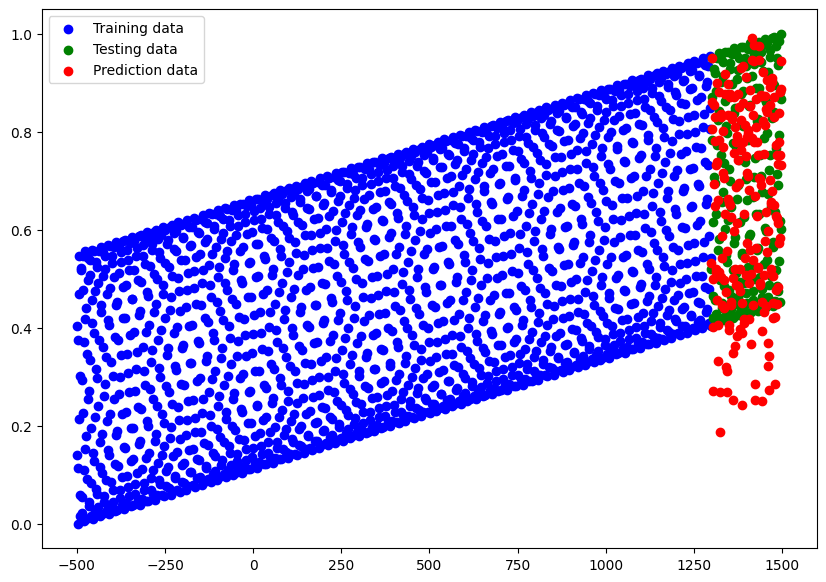

In [567]:
y_scaled_preds12 = model.predict(X_test)

plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, y_scaled_preds12)

Let's visualize of graph on how it improves by epoch.

Text(0.5, 0, 'epochs')

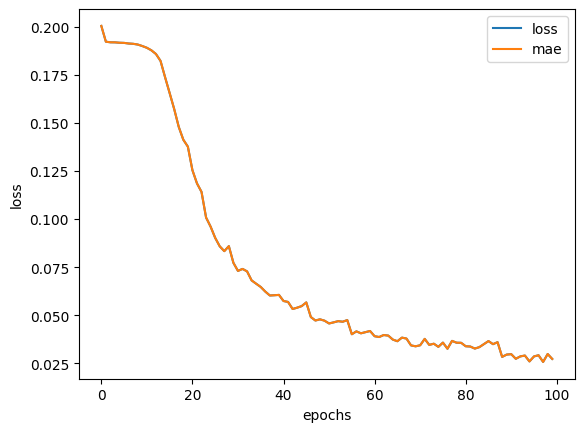

In [568]:
# Create improvement graph by epoch
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Let's see how well the model improves if we now increase epochs till 1,000.

In [593]:
from tensorflow.keras.layers import Dense, PReLU, Activation, Lambda

# Set seed
tf.random.set_seed(35)

# Custom Sinusoidal Activation Function
def sinusoidal(x):
    return tf.sin(x)

# Create the model
model = tf.keras.Sequential([    
    Dense(16), Lambda(sinusoidal),
    Dense(32), Lambda(sinusoidal),
    Dense(64), Lambda(sinusoidal),
    Dense(128), Lambda(sinusoidal),
    Dense(256), Lambda(sinusoidal),
    Dense(128), Lambda(sinusoidal),
    tf.keras.layers.Dense(128), PReLU(),
    Dense(128), Activation('softplus'),
    Dense(64), Lambda(sinusoidal),
    tf.keras.layers.Dense(64), PReLU(),
    Dense(64), Activation('softplus'),
    Dense(32), Activation('softplus'),
    tf.keras.layers.Dense(16), PReLU(),
    Dense(16), Lambda(sinusoidal),
    Dense(16), Activation('softplus'),
    Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Fit the model
history = model.fit(tf.expand_dims(X_train, axis=-1), y_scaled_train, epochs=1000)

Epoch 1/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.2066 - mae: 0.2066
Epoch 2/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1959 - mae: 0.1959
Epoch 3/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1956 - mae: 0.1956
Epoch 4/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1951 - mae: 0.1951
Epoch 5/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1938 - mae: 0.1938
Epoch 6/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1921 - mae: 0.1921
Epoch 7/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1897 - mae: 0.1897
Epoch 8/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1929 - mae: 0.1929
Epoch 9/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1904 - mae: 0.1904
Epoch 10/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1879 - mae: 0.1879
Epoch 11/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1872 - mae: 0.1872
Epoch 12/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1851 - mae: 0.1851
Epoch 13/1000
57/57 ━━━━

Text(0.5, 0, 'epochs')

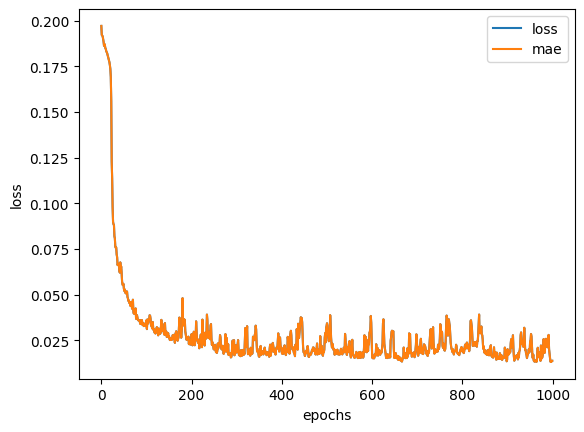

In [594]:
# Create improvement graph by epoch
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

It seems our model starts to relly flatten out around the 300 epochs. Beyond that, there's a few peaks of unulucky attempts the model has in improving it's model accuracy. We got pretty lucky that the model was at it's trough, not at it's peaks.

Next, I want to have a look at the details of our model by calling `.summary`.

In [595]:
model.summary()

Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1101 (Dense)              │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_504 (Lambda)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1102 (Dense)              │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_505 (Lambda)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1103 (Dense)              │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_506 (Lambda)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1104 (Dense)              │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_507 (Lambda)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1105 (Dense)              │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_508 (Lambda)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1106 (Dense)              │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_509 (Lambda)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1107 (Dense)              │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_177 (PReLU)             │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1108 (Dense)              │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_197 (Activation)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1109 (Dense)              │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_510 (Lambda)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1110 (Dense)              │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_178 (PReLU)             │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1111 (Dense)              │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_198 (Activation)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1112 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_199 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1113 (Dense)              │ (None, 16)             │           52

 Total params: 389,717 (1.49 MB)

 Trainable params: 129,905 (507.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 259,812 (1014.89 KB)

Quite a hefty ML model aye?

There's a few takeaways from the amount of testing I've done to perfect the neural network as much as possible:

1. `softplus` Seems to work very well as a sort of outputter/congregator of data after it's been processing and been through other layers. It acts as a funnel of some sort, making it more digestible for the ML model.
2. There's sort of a revolving pattern between `Sinusoidal`, `PreLU` and `softplus`, where they can really work cohesively together.
3. Going by exponents of 2 seem to yield better results (2, 4, 8, 16, 32, etc.). My theories is mostly because each nodes are connected by 2 other nodes, either in front of them, or behind them. Making it better for processing.
4. There seems to be an interesting point in `Sinusoidal`, where there's this exponent increase, and square rooting decrease on the first half of the model, allowing it to be more capable of learning patterns in our data.
5. It makes sense that Sinusoidal does most of the heavy lifting, due to most of it's patern processing is based on sine curves, which is what we utilized in creating our data.

Finally, let's see how well the model has performed on the data.

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 278ms/step - loss: 0.1255 - mae: 0.1255


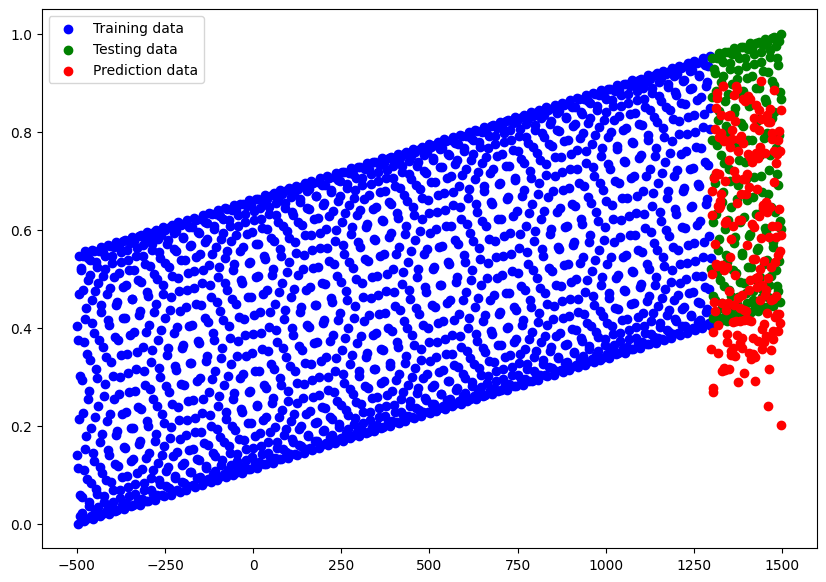

In [597]:
# Our final model
final_model = model.predict(X_test)

final_model_loss, final_model_mae = model.evaluate(X_test, y_scaled_test), plot_predictions(X_train, y_scaled_train, X_test, y_scaled_test, final_model)

In [599]:
# save the model
model.save('best_model_for_this_task.keras')

In [600]:
!dir best_model_for_this_task.keras

 Volume in drive F is Extreme SSD
 Volume Serial Number is CE95-62AC

 Directory of f:\main shit\Code stuffz\tensorflow ztm\01 notebook

21/01/2025  01:14 pm         1,688,258 best_model_for_this_task.keras
               1 File(s)      1,688,258 bytes
               0 Dir(s)  1,221,106,597,888 bytes free
